# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams


In [7]:
data = pd.read_excel("geo.xlsx")

In [8]:
data.drop(columns= 'Unnamed: 0',inplace = True)
data

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1
...,...,...,...
108801,37.454528,55.792331,-1
108802,37.384325,55.899068,-1
108803,37.421066,55.848756,1
108804,37.448509,55.793065,-1


In [9]:
data_p = data[data.comment_class==1]
data_n = data[data.comment_class==-1]
data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [10]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95147 entries, 0 to 108805
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   x              95147 non-null  float64
 1   y              95147 non-null  float64
 2   comment_class  95147 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 MB


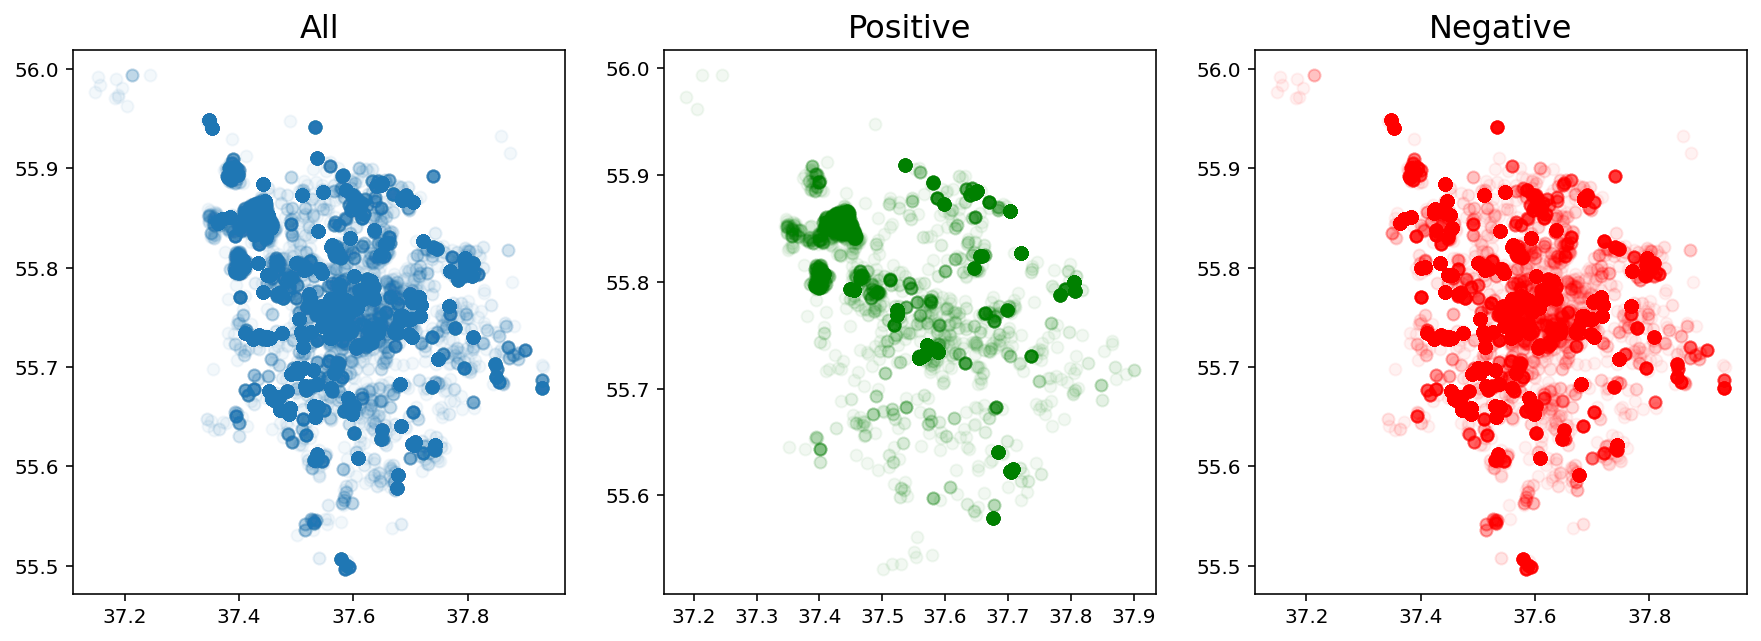

In [11]:
# отобразим плохие и хорошие голоса на карте
rcParams['figure.figsize'] = (5, 5)
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5)) # количество строк и столбцов (и размер)
ax1.scatter(x=data.x, y=data.y, alpha=0.05)
ax2.scatter(x=data_p.x, y=data_p.y, alpha=0.05, color='g')
ax3.scatter(x=data_n.x, y=data_n.y, alpha=0.05, color='r')

titles = ["All", "Positive", "Negative"]
colors = ["b", "g", "r"]
all_data = [data, data_p, data_n]

for number, title in zip (fig.axes, titles):
    number.set_title(title, fontsize=16)





In [12]:
from sklearn.cluster import KMeans, DBSCAN

In [13]:
data_prob = data.drop('comment_class', axis=1)
km = KMeans(n_clusters=8)
km.fit(data_prob)
clusters = km.predict(data_prob)

In [14]:
for i in range(8):
    print (i,'cluster =',len(data_prob[clusters==i]))

0 cluster = 17170
1 cluster = 18008
2 cluster = 17658
3 cluster = 24188
4 cluster = 10045
5 cluster = 3504
6 cluster = 14157
7 cluster = 4076


### Сначала сделаем кластеризацию с KMeans

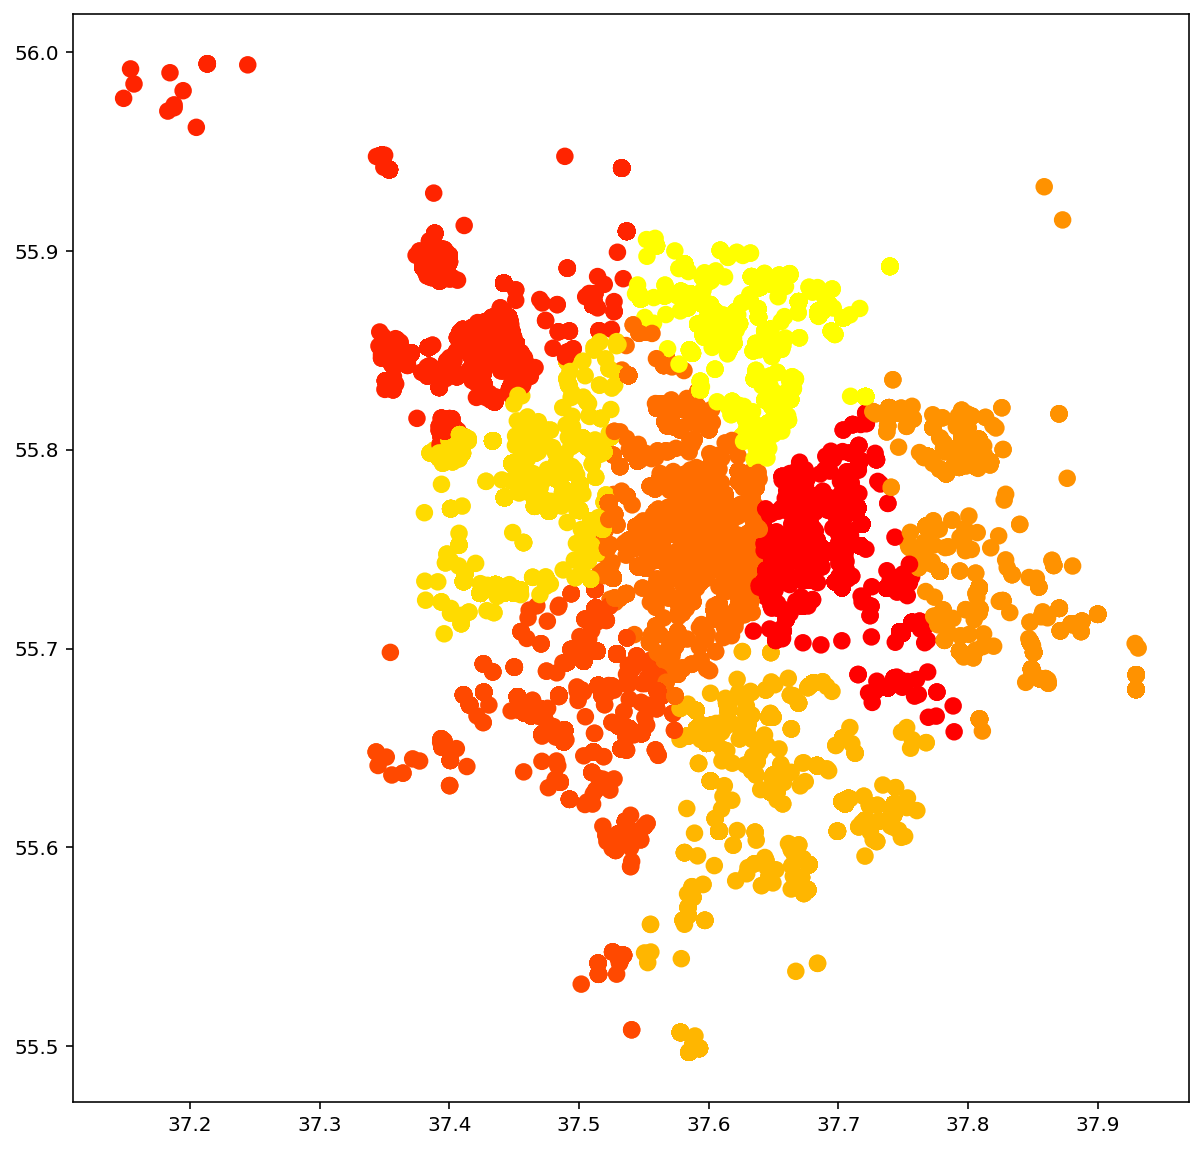

In [15]:
rcParams['figure.figsize'] = (10, 10)
plt.scatter(data_prob.x, data_prob.y, c=clusters, cmap='autumn', s=60)

теперь определим оптимальное число кластеров

In [16]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_km = KMeans(n_clusters=k)
    clusters_km = clf_km.fit_predict(data_prob, )
    k_inertia.append(clf_km.inertia_/100)

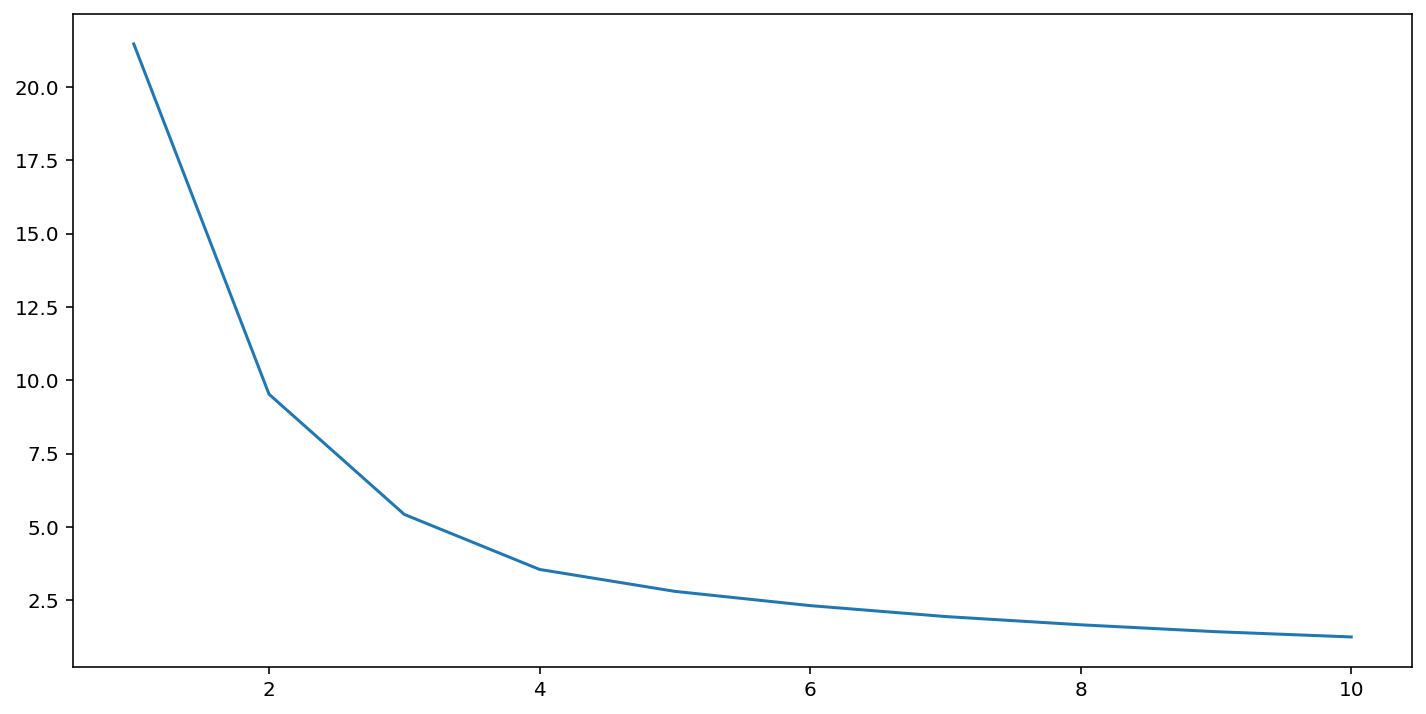

In [17]:
rcParams['figure.figsize'] = (12,6)
plt.plot(ks, k_inertia)

In [18]:
diff = np.diff(k_inertia)           # np.diff - вычислить N-ю дискретную разность по заданной оси

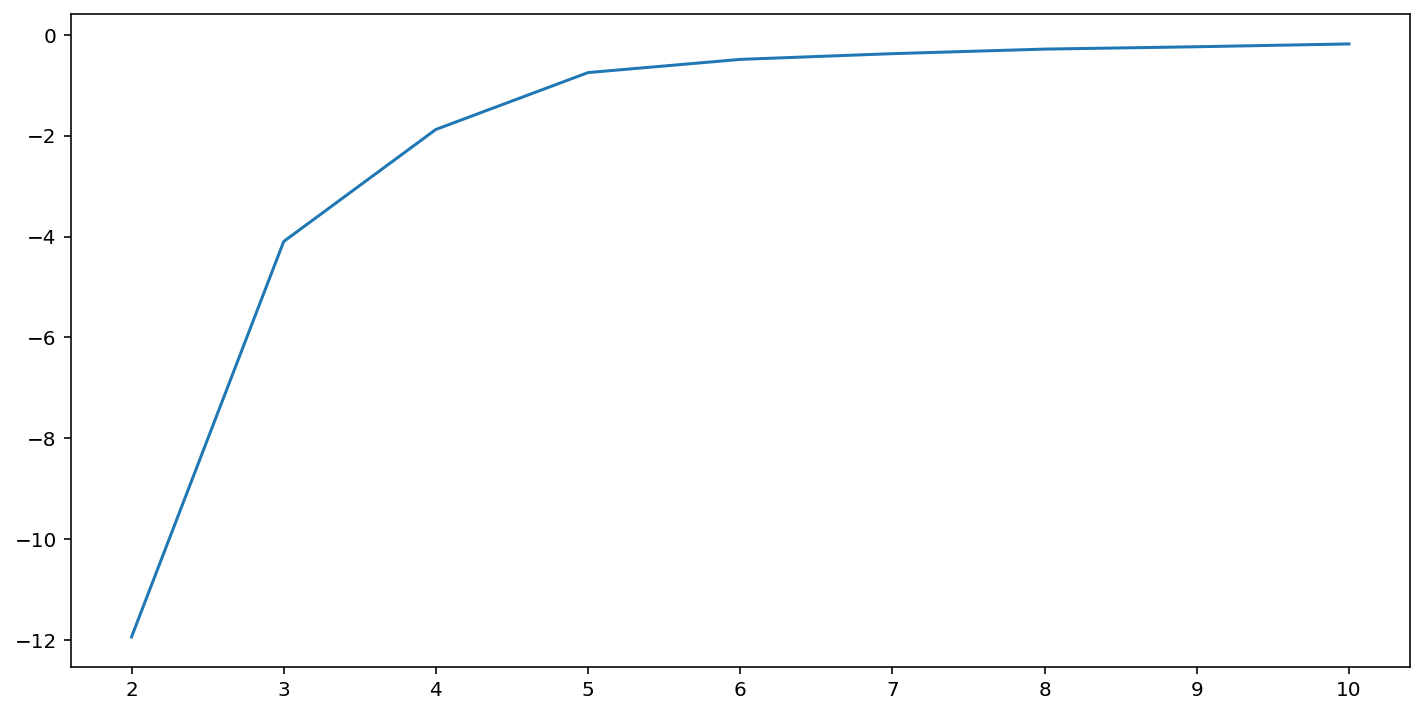

In [19]:
plt.plot(ks[1:], diff)

Исходя из графика, количество кластеров можно было бы оставить 3

Теперь найдём оптимальное число кластеров по этой формуле:
kopt=argmin(inertiak+1−inertiakinertiak−inertiak−1)

In [20]:
diff_r = diff[1:] / diff[:-1]

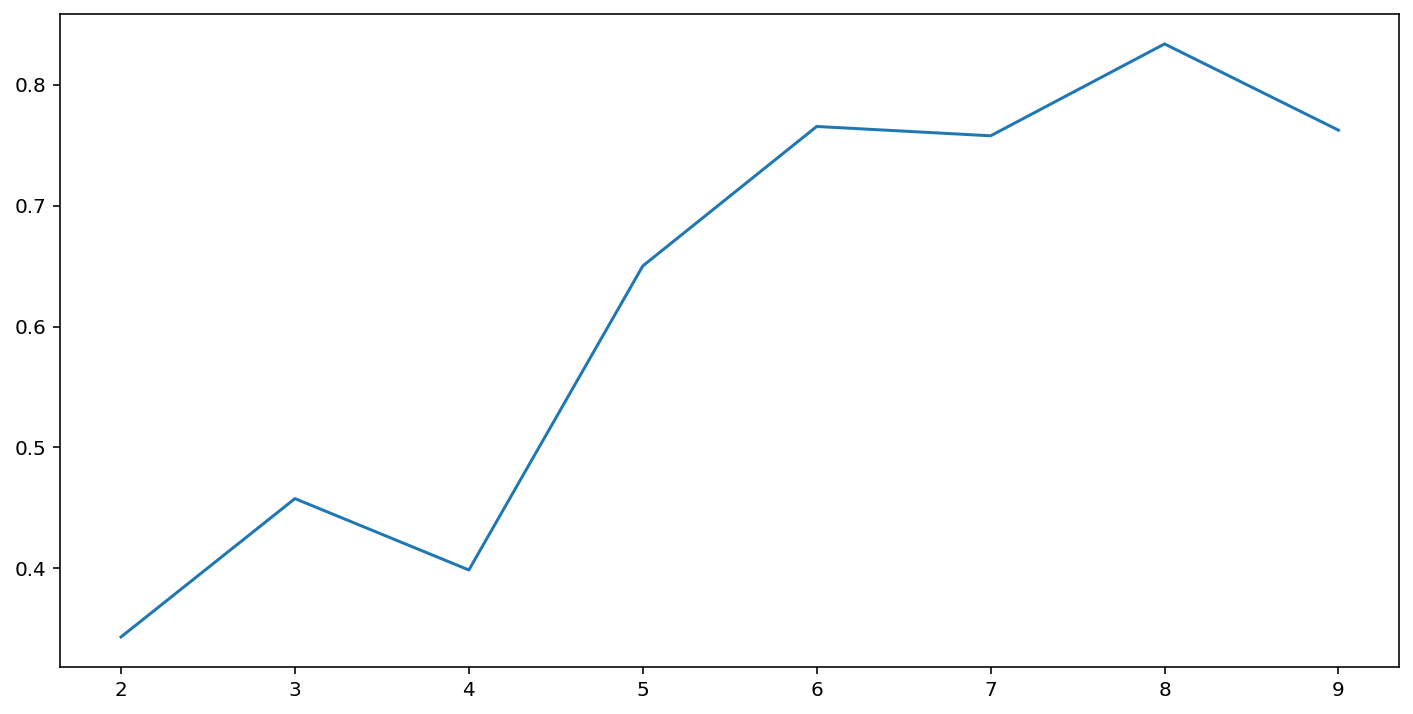

In [21]:
plt.plot(ks[1:-1], diff_r)

In [22]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2

In [23]:
from sklearn.cluster import KMeans

In [24]:
data_p.head(3)

,x,y,comment_class
28,37.588916,55.741982,1
45,37.589311,55.734273,1
46,37.558526,55.728758,1


In [25]:
data_p_pr = data_p.drop('comment_class', axis=1)
data_n_pr = data_n.drop('comment_class', axis=1)

In [26]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_p_pr)
clusters_p = kmeans.predict(data_p_pr)

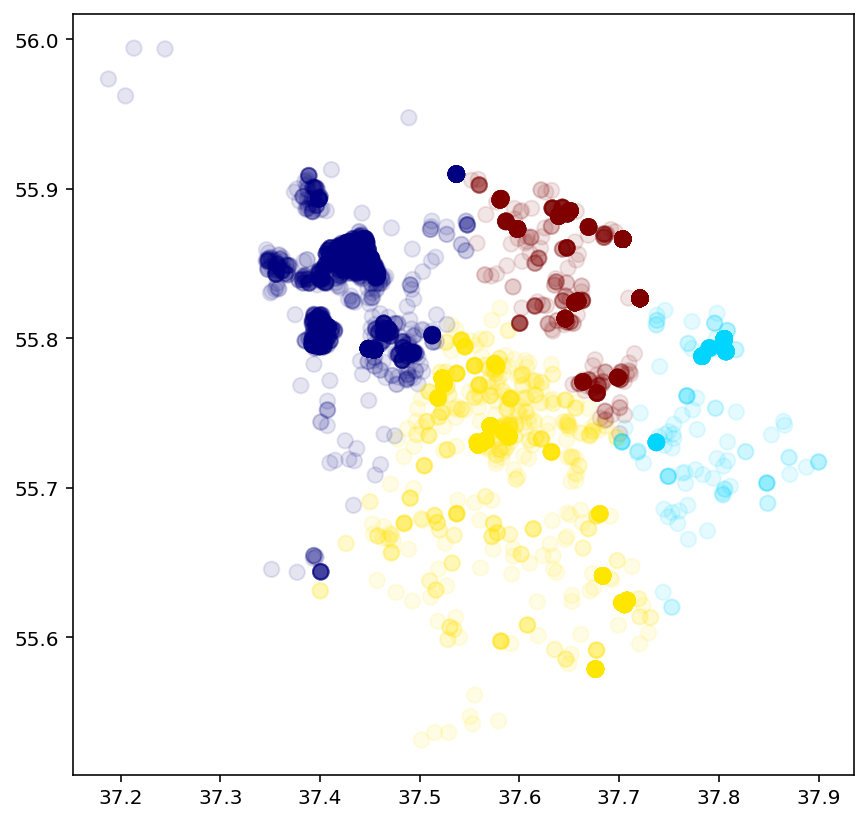

In [27]:
rcParams['figure.figsize'] = (7,7)
    
plt.scatter(data_p_pr.x, data_p_pr.y, c=clusters_p, alpha=0.1, cmap='jet', s=60)

In [28]:
kn_n = KMeans(n_clusters=8)
clusters_n = kn_n.fit_predict(data_n_pr)

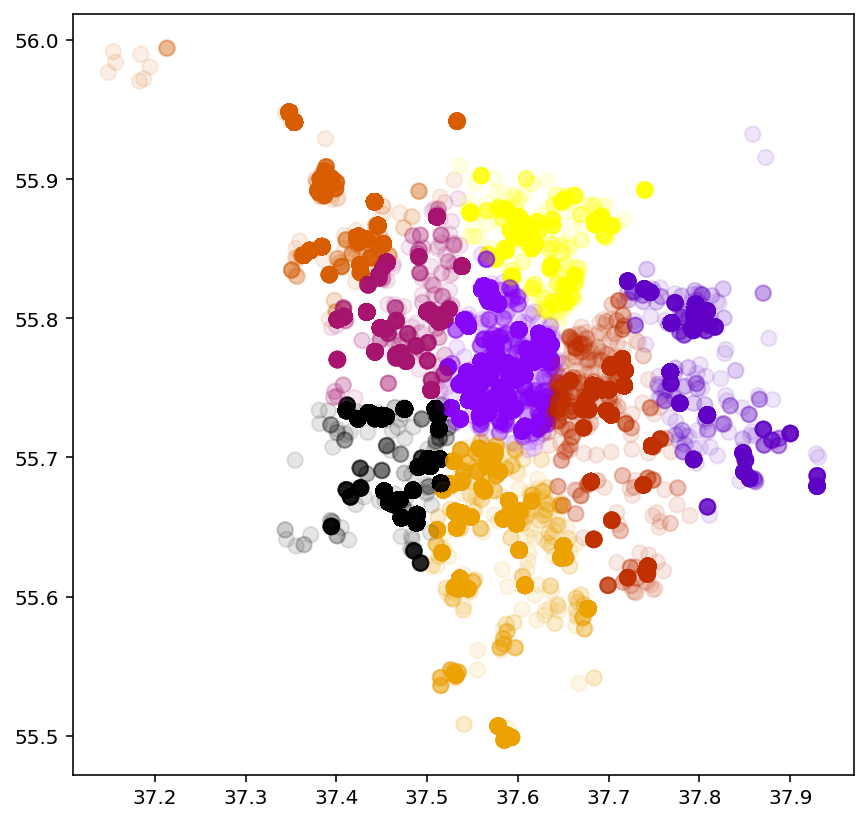

In [29]:
rcParams['figure.figsize'] = (7,7)
plt.scatter(data_n_pr.x, data_n_pr.y, c=clusters_n, alpha=0.1, cmap='gnuplot', s=60)

### Теперь используем DBSCAN

In [35]:
from sklearn.cluster import KMeans, DBSCAN

In [31]:
choice = np.random.choice(data_prob.index, size=50000, replace=False).tolist()
data_50 = data_prob[data_prob.index.isin(choice)]

In [32]:
db_classic = DBSCAN(eps=0.02, min_samples=500, n_jobs=-1 )

In [33]:
db_clusters = db_classic.fit_predict(data_50)

C:\Users\Looly\AppData\Local\Temp/ipykernel_1228/28414017.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_i, y_i, 'ro', c=color)
C:\Users\Looly\AppData\Local\Temp/ipykernel_1228/28414017.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_i, y_i, 'ro', c=color)
C:\Users\Looly\AppData\Local\Temp/ipykernel_1228/28414017.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_0, y_0, 'ro', c='grey')
C:\Users\Looly\AppData\Local\Temp/ipykernel_1228/28414017.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.

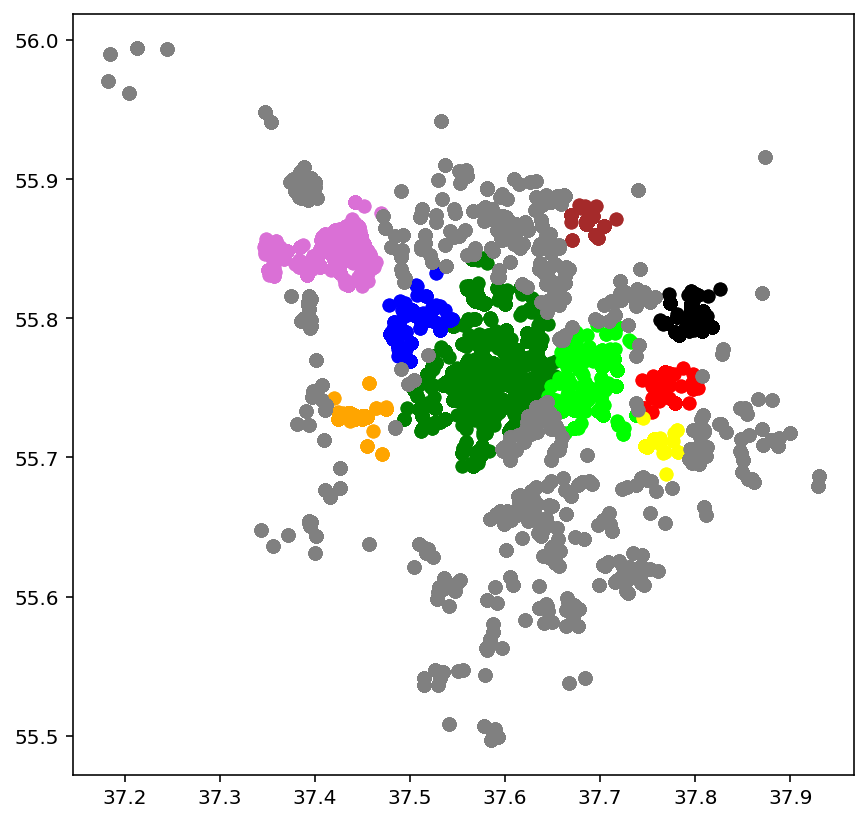

In [34]:
rcParams['figure.figsize'] = (7,7)
for i,color in zip(range(10),{'blue','red','green','black','orange','yellow','brown','orchid','lime'}):
    x_i = data_50.x[db_clusters==i]
    y_i = data_50.y[db_clusters==i]
    plt.plot(x_i, y_i, 'ro', c=color)
    plt.plot(x_i, y_i, 'ro', c=color)
    
    x_0 = data_50.x[db_clusters==-1]
    y_0 = data_50.y[db_clusters==-1]
    plt.plot(x_0, y_0, 'ro', c='grey')

### Теперь выделем основные тематики коментариев жителей(негативные)

In [37]:
data_comment = pd.read_excel('geo_comment.xlsx')

In [38]:
data_comment.drop(columns= 'Unnamed: 0',inplace = True)
data_comment

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...
...,...,...,...,...,...
70377,37.454528,55.792331,-1,1,Не поддерживаю. Я против строительства многоэт...
70378,37.384325,55.899068,-1,1,Не поддерживаю. Не нужны отстойники автобусов ...
70379,37.421066,55.848756,1,1,"Не поддерживаю. На мой взгляд, необходимо искл..."
70380,37.448509,55.793065,-1,1,Не поддерживаю: нарушения при строительстве н...


In [39]:
data_comment_n = data_comment[data_comment['comment_class']==-1]
data_comment_n = data_comment.drop(['x', 'y', 'comment_class'], axis=1)

In [40]:
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
from pymorphy2 import MorphAnalyzer 

In [41]:
data_comment_n.head(3)

,multiplier,comment
0,1,Во все разделы правил землепользования и застр...
1,1,На основании вступившего в законную силу судеб...
2,1,Внести в Проект правил землепользования и заст...


In [42]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")
PortSt = PorterStemmer()
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Looly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Looly\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
chrs_to_delete = string.punctuation + u'»' + u'«' + u'—' + u'“' + u'„' + u'•' + u'#'
translation_table = {ord(c): None for c in chrs_to_delete if c != u'-'}
PortSt = PorterStemmer()
stopw  = stopwords.words('russian') # подключаем стопслова

In [47]:
clean_dict = {}
counter = 0

for number, doc in zip(range(10000), data_comment_n.comment):
    body = doc
    body = re.sub('\[.*?\]','', body)
    if body != '':
        body_clean = body.translate(translation_table).lower().strip()
        words = word_tokenize(body_clean)
        tokens = []
        # делаем стемминг и нормализацию
        for word in words:
            if re.match('^[a-z0-9-]+$', word) is not None:
                tokens.append(PortSt.stem(word))
            elif word.count('-') > 1:
                tokens.append(word)
            else:
                filtered_tokens = []
                filtered_tokens.append(word)
                for t in filtered_tokens:
                    stems = stemmer.stem(t)
                    tokens.append(stems)
        # убираем стоп слова
        tokens = filter(
            lambda token: token not in stopw, sorted(set(tokens))
        )

        # убираем слова маленькой длины
        tokens = filter(lambda token: len(token) > 3, tokens)
    else:
        tokens = []
    counter += 1
    if counter % 500 == 0:
        print("{0} docs processed".format(counter))
    if counter == 10000: # для простоты расчета возьмем выборку из 10 000
        break
    clean_dict[number] = tokens


clean_dict = {key: list(val) for key, val in clean_dict.items()}

500 docs processed
1000 docs processed
1500 docs processed
2000 docs processed
2500 docs processed
3000 docs processed
3500 docs processed
4000 docs processed
4500 docs processed
5000 docs processed
5500 docs processed
6000 docs processed
6500 docs processed
7000 docs processed
7500 docs processed
8000 docs processed
8500 docs processed
9000 docs processed
9500 docs processed
10000 docs processed


In [48]:
!python -m pip install -U gensim
from gensim.corpora import TextCorpus
from gensim.models.ldamodel import LdaModel

class ListTextCorpus(TextCorpus):

    def get_texts(self):
        for doc in self.input:
            yield doc
                
mycorp = ListTextCorpus(input=clean_dict.values())
justlda = LdaModel(
    corpus=mycorp, num_topics=4, passes=30
)

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24


In [49]:
# Получаем описание 4 тематик
print('LdaModel performance')
for i in range(4):
    terms = justlda.get_topic_terms(i)
    print(i, ' '.join(map(lambda x: mycorp.dictionary.get(x[0]), terms)))

LdaModel performance
0 сквер изменен северн проект москв округ строительств правительств комплекс застройк
1 соответств федеральн план законодательств кодекс объект использован землепользован градостроительн слушан
2 проект адрес застройк москв территор объект участк прав строительств район
3 адрес гараж предельн застройк строительств площад территор развит высот земельн
